In [1]:
# Import Libraries
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline
import warnings  
warnings.filterwarnings('ignore')

In [21]:
#Perform Exploratory Data Analysis in just one line of code
#pandas_profiling.ProfileReport(pd.read_csv('E:/anakdata.id/Week 4/WA_Fn-UseC_-Telco-Customer-Churn.csv'))

In [2]:
#Import Customer Churn Dataset
df = pd.read_csv('E:/anakdata.id/Week 4/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Number of Columns and Rows in the Dataset
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges column is seen as object type, but includes numeric type values. Convert this column to numeric.

In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
#Checking missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
#Delete missing values
df.dropna(inplace=True)

We don't need customerID column for analyzing, so we can drop this column.

In [13]:
df.drop(["customerID"],axis=1,inplace = True)

Replace text columns to integers. The columns below includes similar text values so I changed them once.

In [20]:
df.gender = [1 if each == "Male" else 0 for each in df.gender]

columns_to_convert = ['Partner', 
                      'Dependents', 
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


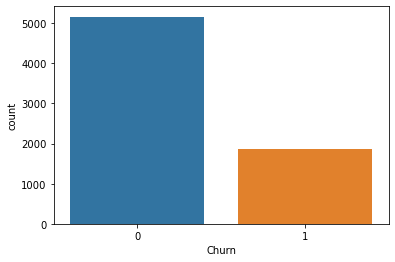

In [21]:
# Visualize Total Customer Churn
sns.countplot(x="Churn",data=df);

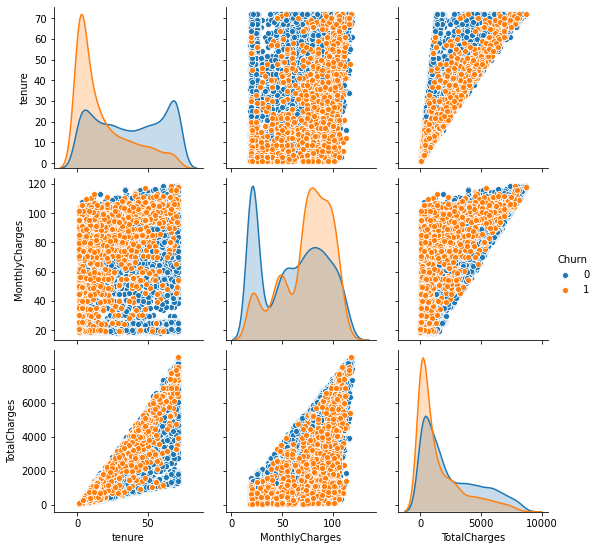

In [23]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

People having lower tenure and higher monthly charges are tend to churn more. Also as you can see below; having month-to-month contract and fiber obtic internet have a really huge effect on churn probability.

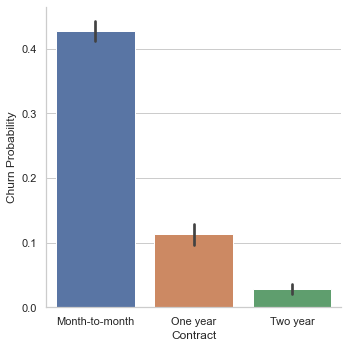

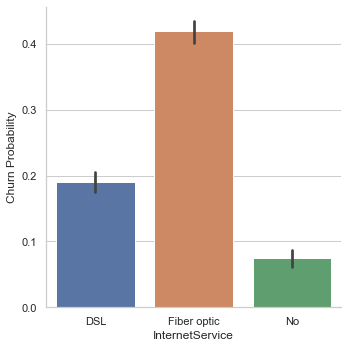

In [25]:
sns.set(style="whitegrid")
g1=sns.catplot(x="Contract", y="Churn", data=df,kind="bar")
g1.set_ylabels("Churn Probability")

g2=sns.catplot(x="InternetService", y="Churn", data=df,kind="bar")
g2.set_ylabels("Churn Probability")

Convert remaining text based columns to dummy columns using pandas get_dummies function. This function creates new columns named as values of the related columns.

Now our data set only have integer and numerical columns so that we can apply statistical models.

In [26]:
#Get Dummies
data = pd.get_dummies(data=df)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,-1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,-1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Let's see the correlation between churn and the remaining columns. Customers having month-to-month contract, having fiber optic internet service and using electronic payment are tend to churn more whereas people having two-year contract and having internet service are tend to not churn.

In [27]:
df.corr()['Churn'].sort_values()

tenure             -0.354049
TotalCharges       -0.199484
Dependents         -0.163128
Partner            -0.149982
gender             -0.008545
PhoneService        0.011691
OnlineSecurity      0.023014
TechSupport         0.026744
MultipleLines       0.036148
OnlineBackup        0.073934
DeviceProtection    0.084402
SeniorCitizen       0.150541
StreamingMovies     0.162672
StreamingTV         0.164509
PaperlessBilling    0.191454
MonthlyCharges      0.192858
Churn               1.000000
Name: Churn, dtype: float64

Prepare x and y

First, seperate x and y values. y would be our class which is Churn column in this dataset. x would be the remaing columns. Also, apply normalization to x in order to scale all values between 0 and 1.

In [30]:
#assign Class_att column as y attribute
y = df.Churn.values

#drop Class_att column, remain only numerical columns
new_df = df.drop(["Churn"],axis=1)

#Normalize values to fit between 0 and 1. 
x = (new_df-np.min(new_df))/(np.max(new_df)-np.min(new_df)).values

TypeError: unsupported operand type(s) for -: 'str' and 'str'